In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
DATA_DIR = r"C:\Users\patka\Downloads\Vision_artificial\archive"
IMG_SIZE = (320, 258)
BATCH_SIZE = 128
SEED = 42

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 70549 files belonging to 15 classes.
Using 56440 files for training.
Found 70549 files belonging to 15 classes.
Using 14109 files for validation.


In [ ]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

In [ ]:
model = models.Sequential([
    layers.Conv2D(16, 3, activation="relu", input_shape=(*IMG_SIZE, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(15, activation="softmax")
])

C:\Users\patka\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=6
)

Epoch 1/6
441/441 ━━━━━━━━━━━━━━━━━━━━ 580s 1s/step - accuracy: 0.8512 - loss: 0.5531 - val_accuracy: 0.9335 - val_loss: 0.1962
Epoch 2/6
441/441 ━━━━━━━━━━━━━━━━━━━━ 582s 1s/step - accuracy: 0.9634 - loss: 0.1077 - val_accuracy: 0.9430 - val_loss: 0.1775
Epoch 3/6
441/441 ━━━━━━━━━━━━━━━━━━━━ 580s 1s/step - accuracy: 0.9847 - loss: 0.0473 - val_accuracy: 0.9545 - val_loss: 0.1407
Epoch 4/6
441/441 ━━━━━━━━━━━━━━━━━━━━ 578s 1s/step - accuracy: 0.9935 - loss: 0.0220 - val_accuracy: 0.9531 - val_loss: 0.1618
Epoch 5/6
441/441 ━━━━━━━━━━━━━━━━━━━━ 585s 1s/step - accuracy: 0.9948 - loss: 0.0183 - val_accuracy: 0.9575 - val_loss: 0.1616
Epoch 6/6
441/441 ━━━━━━━━━━━━━━━━━━━━ 601s 1s/step - accuracy: 0.9974 - loss: 0.0086 - val_accuracy: 0.9564 - val_loss: 0.1898


In [ ]:
loss, acc = model.evaluate(val_ds)
print("Accuracy:", acc)


111/111 ━━━━━━━━━━━━━━━━━━━━ 36s 323ms/step - accuracy: 0.9564 - loss: 0.1898
Accuracy: 0.956410825252533


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
y_true = []

for images, labels in val_ds:
    y_true.extend(labels.numpy())

y_true = np.array(y_true)

In [ ]:
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

111/111 ━━━━━━━━━━━━━━━━━━━━ 34s 302ms/step


In [ ]:
original_ds = tf.keras.preprocessing.image_dataset_from_directory(r"C:\Users\patka\Downloads\Vision_artificial\archive")
class_names = original_ds.class_names
print(class_names)

Found 70549 files belonging to 15 classes.
['Apple', 'Banana', 'Carambola', 'Guava', 'Kiwi', 'Mango', 'Orange', 'Peach', 'Pear', 'Persimmon', 'Pitaya', 'Plum', 'Pomegranate', 'Tomatoes', 'muskmelon']


In [ ]:
print(classification_report(y_true, y_pred, target_names=class_names))


              precision    recall  f1-score   support

       Apple       0.16      0.18      0.17      2310
      Banana       0.04      0.03      0.04       601
   Carambola       0.03      0.02      0.03       401
       Guava       0.29      0.28      0.29      3974
        Kiwi       0.12      0.12      0.12      1660
       Mango       0.06      0.07      0.06       837
      Orange       0.05      0.05      0.05       623
       Peach       0.02      0.02      0.02       491
        Pear       0.05      0.04      0.05       628
   Persimmon       0.02      0.02      0.02       410
      Pitaya       0.03      0.03      0.03       478
        Plum       0.04      0.04      0.04       440
 Pomegranate       0.03      0.04      0.04       411
    Tomatoes       0.03      0.03      0.03       437
   muskmelon       0.02      0.01      0.02       408

    accuracy                           0.14     14109
   macro avg       0.07      0.07      0.07     14109
weighted avg       0.14   

<Figure size 2640x1440 with 0 Axes>

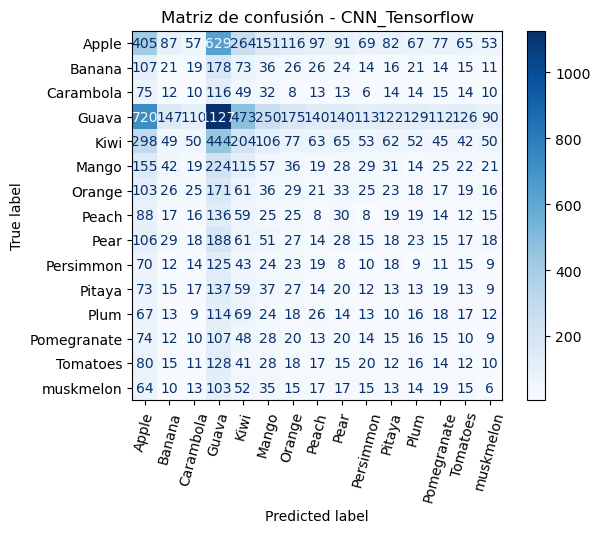

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(22, 12), dpi=120, constrained_layout=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=75)
plt.title("Matriz de confusión - CNN_Tensorflow")
plt.show()
plt.close()

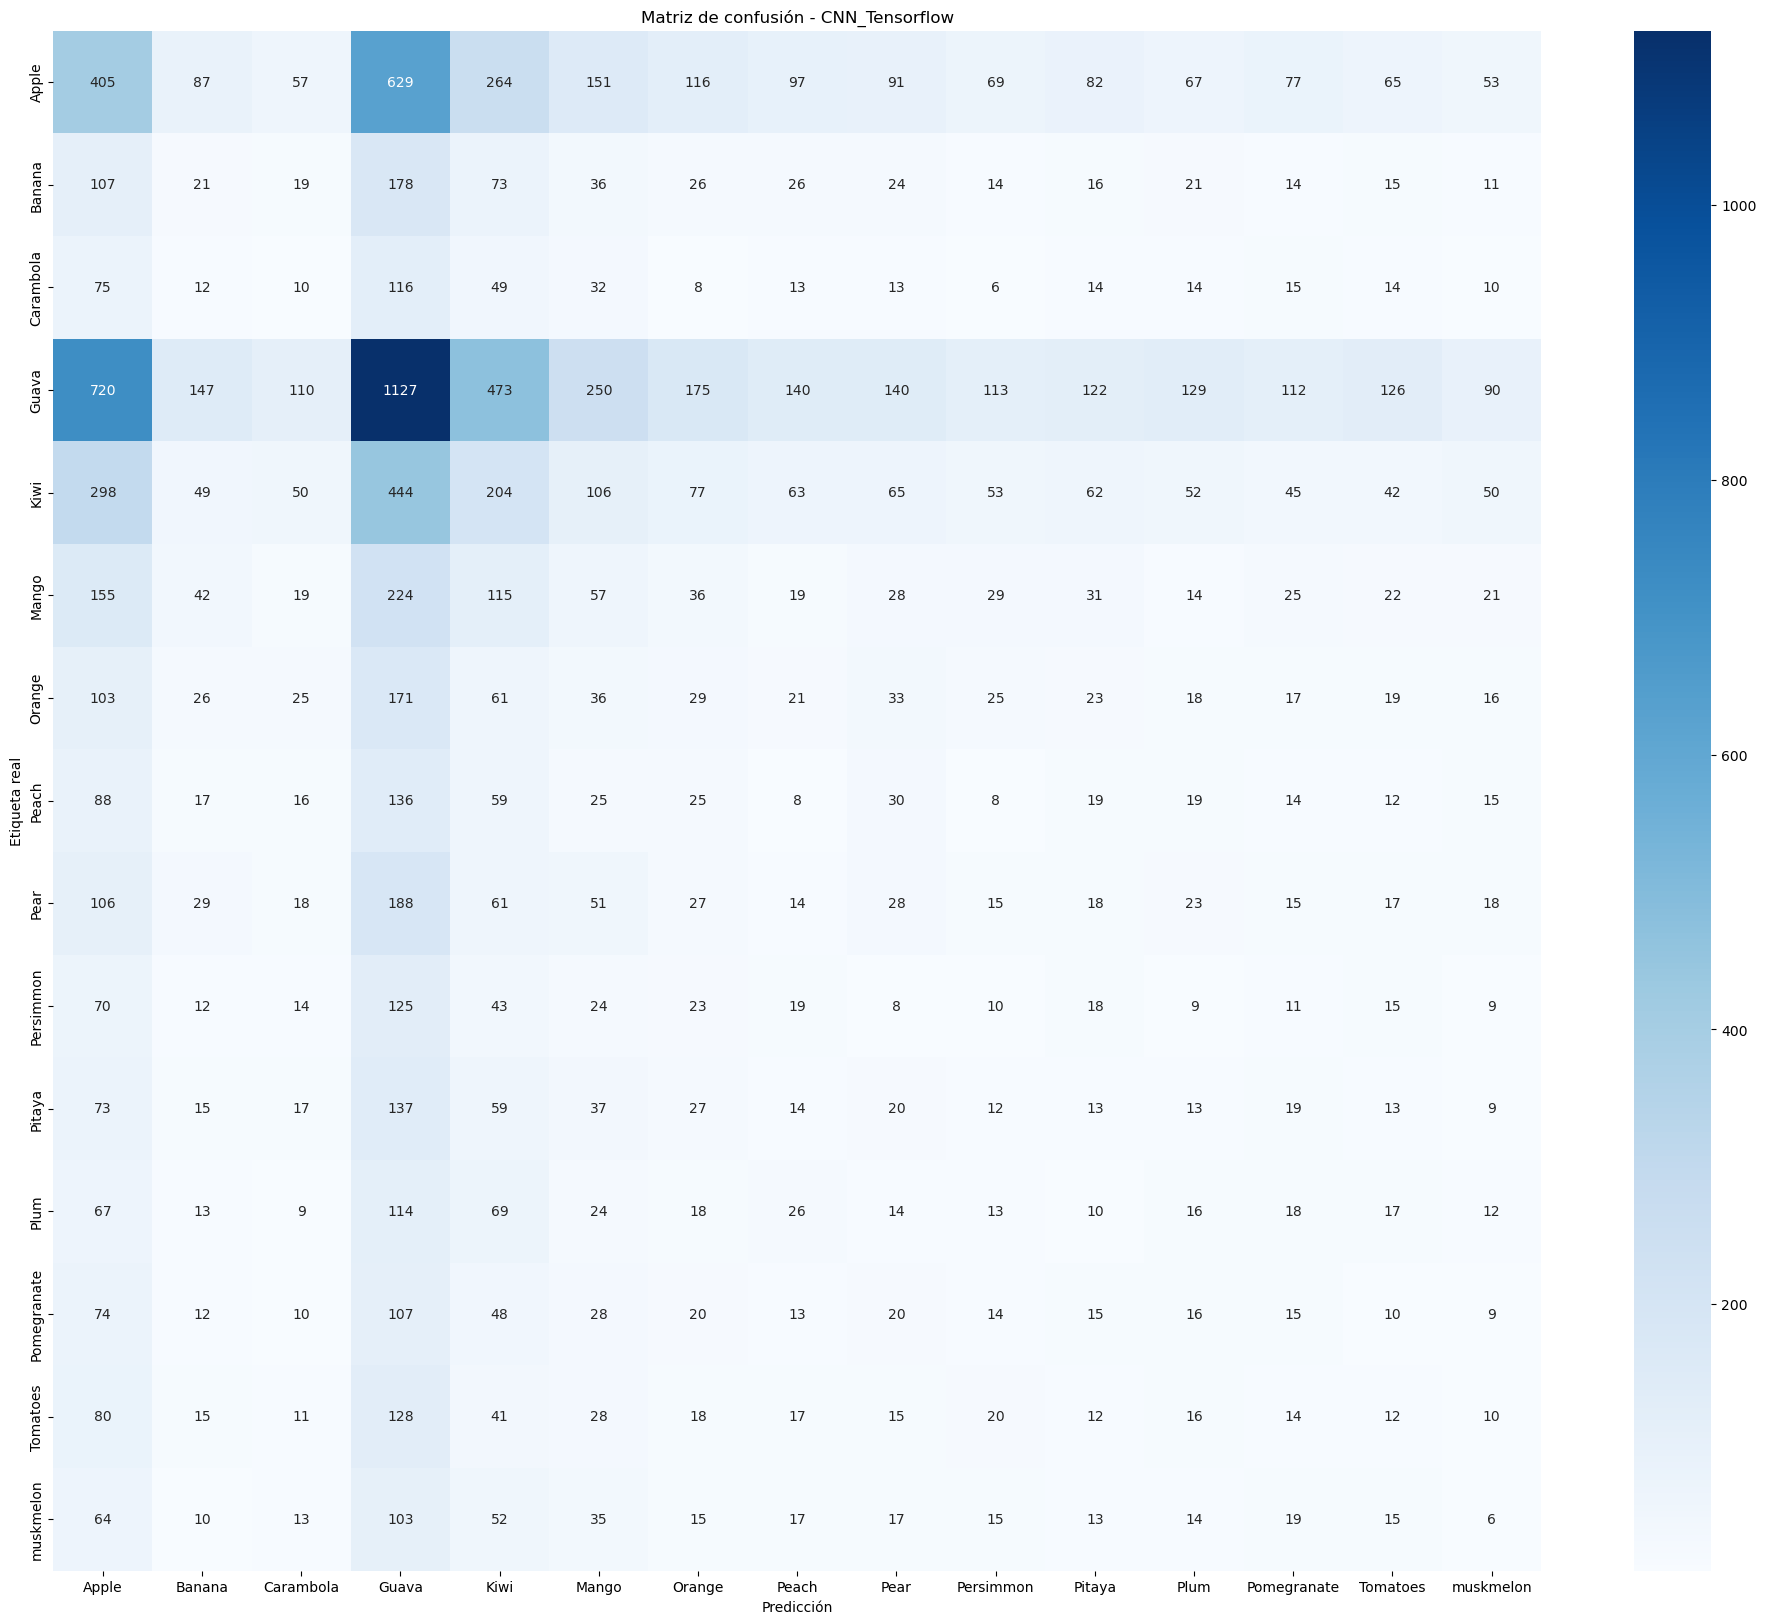

In [ ]:
import seaborn as sns

plt.figure(figsize=(24, 20))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de confusión - CNN_Tensorflow")
plt.show()

Normalized confusion matrix


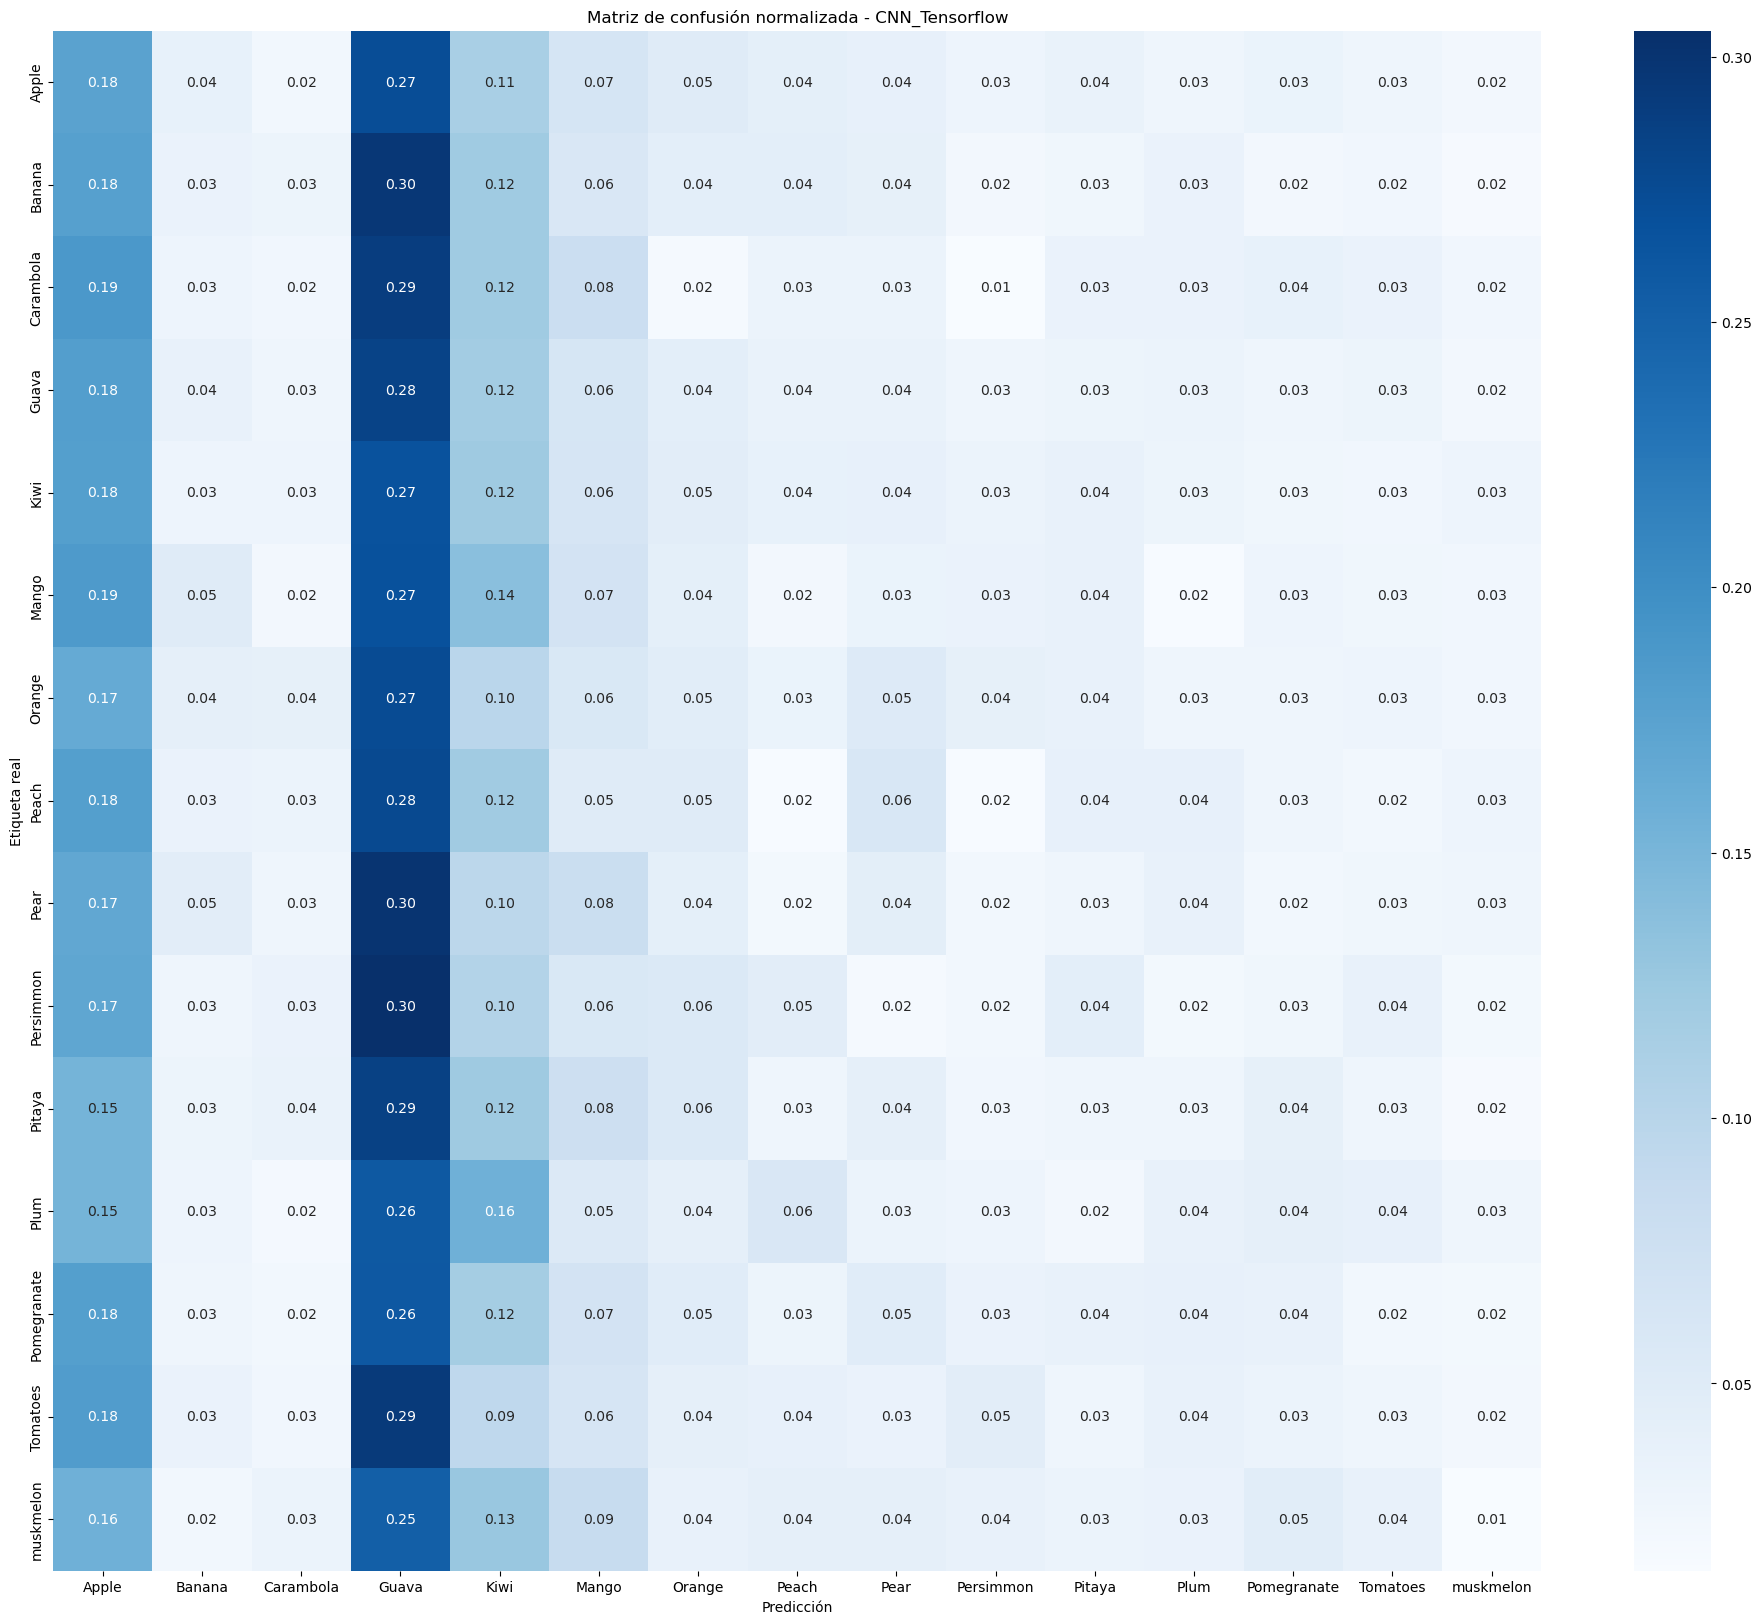

In [ ]:
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')

plt.figure(figsize=(24, 20))
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de confusión normalizada - CNN_Tensorflow")
plt.show()